# **Attrition Prediction: Human Resources**
- **Nama:** Muhammad Azhar Fikri
- **Email:** muhammadazharfikri990@gmail.com
- **ID Dicoding:** ririee

In [147]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.compose import ColumnTransformer
from scipy.stats import chi2_contingency, pearsonr, f_oneway
from sklearn.feature_selection import RFE, SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from google.colab import userdata
from sqlalchemy import create_engine

In [148]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv",
    encoding='windows-1252'
    )

In [149]:
df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## **Data Understanding**



Data ini berisi detail demografis, metrik terkait pekerjaan, dan indikator apakah karyawan mengalami attrition (berhenti bekerja).

- **EmployeeId** - ID Karyawan
- **Attrition** - Apakah karyawan berhenti? (0=tidak, 1=ya)
- **Age** - Usia karyawan
- **BusinessTravel** - Frekuensi perjalanan dinas untuk pekerjaan
- **DailyRate** - Gaji harian
- **Department** - Departemen tempat bekerja
- **DistanceFromHome** - Jarak dari rumah ke tempat kerja (dalam km)
- **Education** - Tingkat pendidikan (1-Di bawah kuliah, 2-Kuliah, 3-Sarjana, 4-Magister, 5-Doktor)
- **EducationField** - Bidang pendidikan
- **EnvironmentSatisfaction** - Kepuasan terhadap lingkungan kerja (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi)
- **Gender** - Jenis kelamin karyawan
- **HourlyRate** - Gaji per jam
- **JobInvolvement** - Keterlibatan dalam pekerjaan (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi)
- **JobLevel** - Tingkatan pekerjaan (1 sampai 5)
- **JobRole** - Peran atau jabatan pekerjaan
- **JobSatisfaction** - Kepuasan terhadap pekerjaan (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi)
- **MaritalStatus** - Status pernikahan
- **MonthlyIncome** - Gaji bulanan
- **MonthlyRate** - Tarif bulanan
- **NumCompaniesWorked** - Jumlah perusahaan yang pernah dijadikan tempat kerja
- **Over18** - Apakah berusia di atas 18 tahun?
- **OverTime** - Apakah bekerja lembur?
- **PercentSalaryHike** - Persentase kenaikan gaji tahun lalu
- **PerformanceRating** - Penilaian kinerja (1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa)
- **RelationshipSatisfaction** - Kepuasan hubungan kerja (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi)
- **StandardHours** - Jam kerja standar
- **StockOptionLevel** - Tingkat opsi saham
- **TotalWorkingYears** - Total tahun bekerja
- **TrainingTimesLastYear** - Jumlah pelatihan yang diikuti tahun lalu
- **WorkLifeBalance** - Keseimbangan kerja dan kehidupan pribadi (1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa)
- **YearsAtCompany** - Lama bekerja di perusahaan saat ini (dalam tahun)
- **YearsInCurrentRole** - Lama menjabat posisi saat ini (dalam tahun)
- **YearsSinceLastPromotion** - Lama sejak promosi terakhir (dalam tahun)
- **YearsWithCurrManager** - Lama bekerja dengan manajer saat ini (dalam tahun)


In [150]:
df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [152]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## **Data Preparation**

In [153]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [154]:
df.dropna(inplace=True)

In [155]:
df.duplicated().sum()

np.int64(0)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

In [157]:
df.Attrition.value_counts()

,count
Attrition,
0.0,879
1.0,179


In [158]:
num = df.select_dtypes(include=['int64', 'float64']).columns
cat = df.select_dtypes(include='object').columns

print("Jumlah data numerik :", len(num))
print("Jumlah data kategorik :", len(cat))

Jumlah data numerik : 27
Jumlah data kategorik : 8


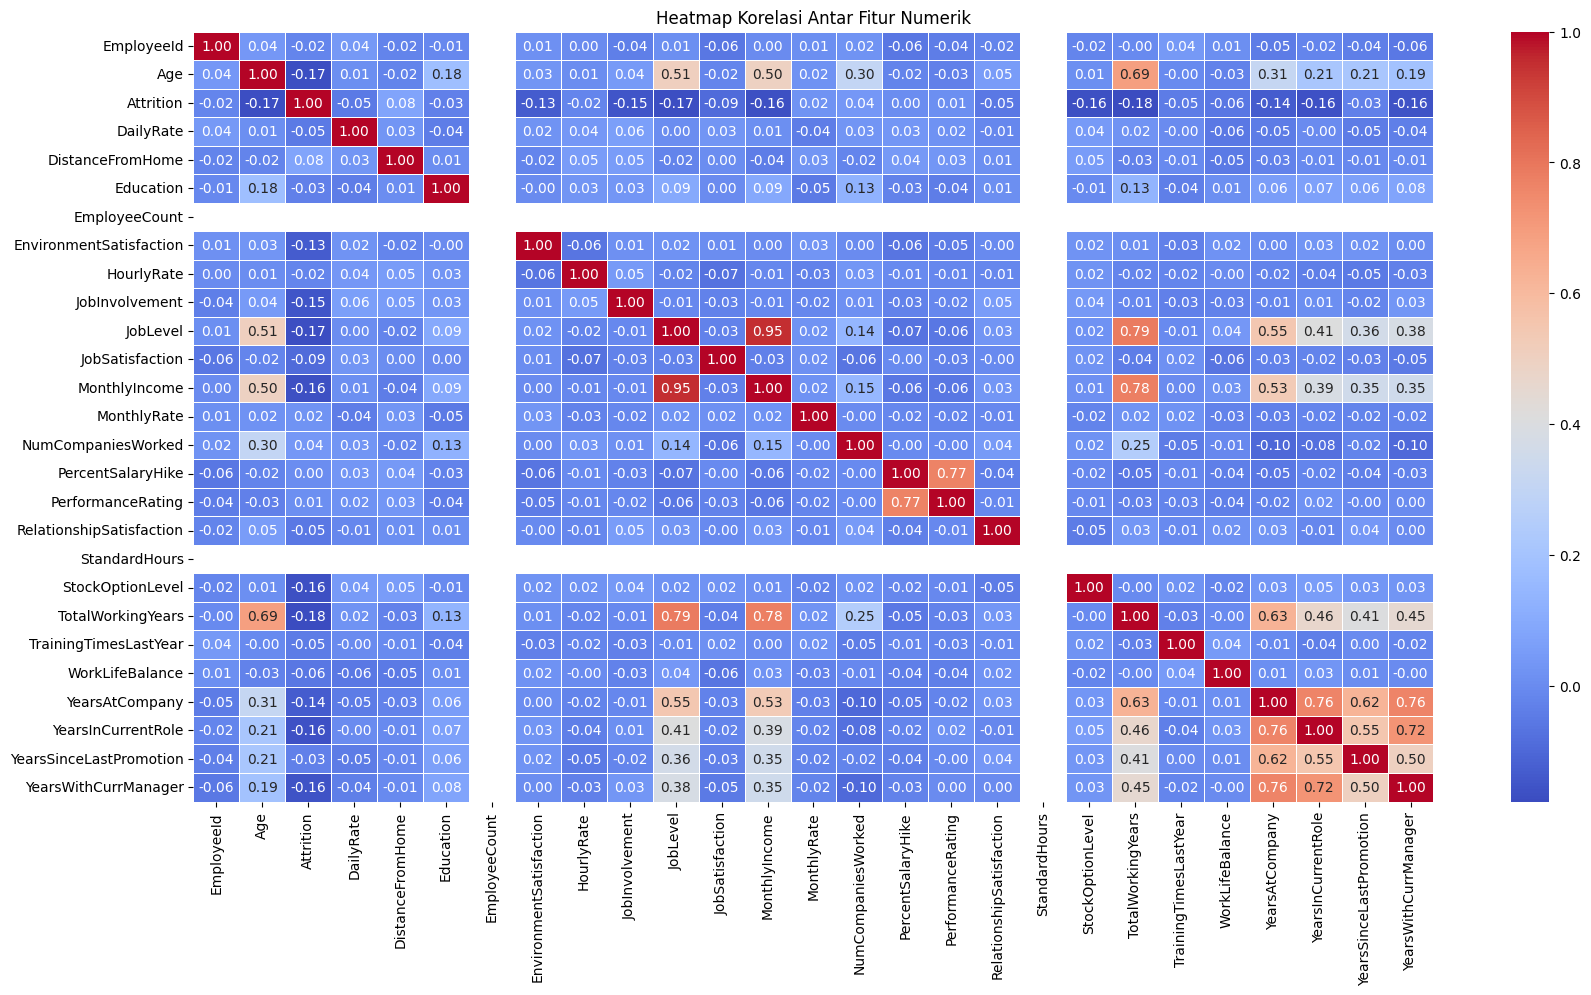

In [159]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(20, 10))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

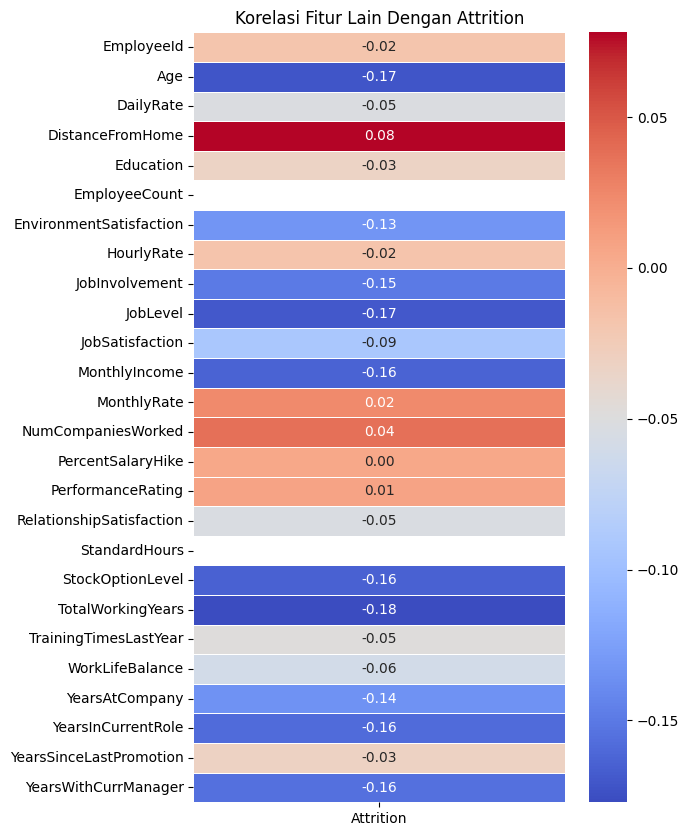

In [160]:
correlation_matrix = df[num_features].corr()

attrition_corr = correlation_matrix[['Attrition']].drop('Attrition')

plt.figure(figsize=(6, 10))
sns.heatmap(attrition_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

plt.title('Korelasi Fitur Lain Dengan Attrition')
plt.show()

In [161]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()

aov_results = {}

for col in cat_features:
    groups = [df[df[col] == val]['Attrition'].dropna() for val in df[col].dropna().unique()]
    if len(groups) > 1:
        try:
            f_stat, p_val = f_oneway(*groups)
            aov_results[col] = {'F-stat': round(f_stat, 2), 'p-val': p_val}
        except Exception as e:
            aov_results[col] = {'error': str(e)}

aov_df = pd.DataFrame(aov_results).T.sort_values('p-val')
print(aov_df)

                F-stat         p-val
OverTime         73.97  2.828069e-17
JobRole           8.78  1.131483e-11
MaritalStatus    19.45  5.074128e-09
BusinessTravel    6.77  1.200086e-03
EducationField    1.97  8.063917e-02
Department        2.32  9.904897e-02
Gender            0.27  6.057248e-01


In [162]:
X = df.drop(columns='Attrition')
y = LabelEncoder().fit_transform(df['Attrition'])

X_encoded = X.apply(LabelEncoder().fit_transform)
mui_score = mutual_info_classif(X_encoded, y)

mui_df = pd.DataFrame({'Fitur': X.columns, 'MI Score': mui_score}).sort_values(by='MI Score', ascending=False)
print(mui_df)

                       Fitur  MI Score
1                        Age  0.050197
21                  OverTime  0.044522
27         TotalWorkingYears  0.038550
30            YearsAtCompany  0.031980
14                   JobRole  0.025444
12            JobInvolvement  0.021881
31        YearsInCurrentRole  0.016841
2             BusinessTravel  0.014805
26          StockOptionLevel  0.014781
17             MonthlyIncome  0.014766
16             MaritalStatus  0.013311
28     TrainingTimesLastYear  0.012178
18               MonthlyRate  0.010623
33      YearsWithCurrManager  0.009837
13                  JobLevel  0.007227
8              EmployeeCount  0.007100
9    EnvironmentSatisfaction  0.007088
20                    Over18  0.005773
6                  Education  0.004002
5           DistanceFromHome  0.003656
15           JobSatisfaction  0.002925
19        NumCompaniesWorked  0.002463
23         PerformanceRating  0.001105
4                 Department  0.000900
0                 Employe

In [163]:
import_cat = ['JobRole', 'OverTime', 'MaritalStatus']
import_num = ['Age', 'JobInvolvement', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'TotalWorkingYears', 'JobSatisfaction', 'MonthlyIncome']

features_df = df[import_cat + import_num + ['Attrition']]

In [164]:
for col in import_cat:
    print("\n" + "="*50)
    print(features_df[col].value_counts())


JobRole
Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: count, dtype: int64

OverTime
No     751
Yes    307
Name: count, dtype: int64

MaritalStatus
Married     464
Single      352
Divorced    242
Name: count, dtype: int64


In [165]:
onho_enc = OneHotEncoder(drop='first', dtype=int, sparse_output=False, handle_unknown='ignore')
enc_cat = onho_enc.fit_transform(features_df[import_cat])
enc_cat_cols = onho_enc.get_feature_names_out(import_cat)

encoded_df = pd.DataFrame(enc_cat, columns=enc_cat_cols, index=features_df.index)
num_cols = features_df.drop(columns=import_cat + ['Attrition']).columns

features_df_final = pd.concat([
    features_df[num_cols], encoded_df, features_df['Attrition']
], axis=1)

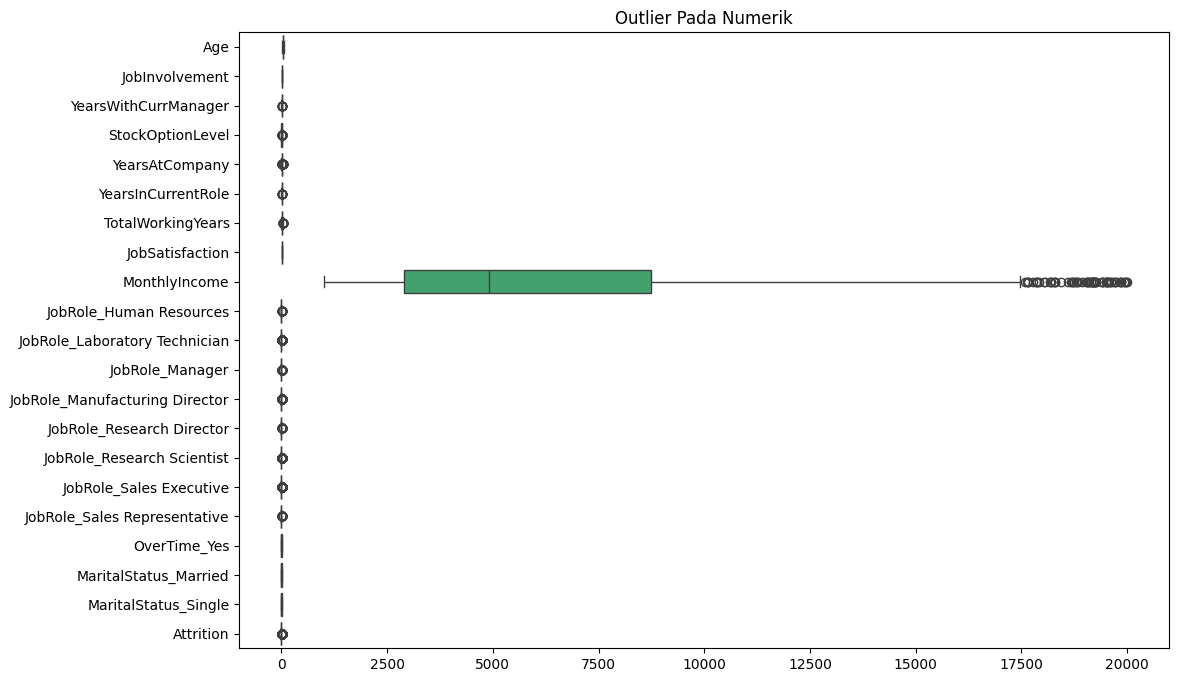

In [166]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=features_df_final.select_dtypes(include=np.number), orient='h')
plt.title("Outlier Pada Numerik")
plt.show()

## **Exploratory Data Analysis (EDA)**

In [167]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   JobRole               1058 non-null   object 
 1   OverTime              1058 non-null   object 
 2   MaritalStatus         1058 non-null   object 
 3   Age                   1058 non-null   int64  
 4   JobInvolvement        1058 non-null   int64  
 5   YearsWithCurrManager  1058 non-null   int64  
 6   StockOptionLevel      1058 non-null   int64  
 7   YearsAtCompany        1058 non-null   int64  
 8   YearsInCurrentRole    1058 non-null   int64  
 9   TotalWorkingYears     1058 non-null   int64  
 10  JobSatisfaction       1058 non-null   int64  
 11  MonthlyIncome         1058 non-null   int64  
 12  Attrition             1058 non-null   float64
dtypes: float64(1), int64(9), object(3)
memory usage: 115.7+ KB


In [168]:
features_df.describe(include='all')

,JobRole,OverTime,MaritalStatus,Age,JobInvolvement,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,TotalWorkingYears,JobSatisfaction,MonthlyIncome,Attrition
count,1058,1058,1058,1058.000000,1058.00000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000,1058.000000,1058.000000
unique,9,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sales Executive,No,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,232,751,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,37.055766,2.73724,4.142722,0.762760,7.065217,4.26087,11.435728,2.749527,6625.945180,0.169187
std,NaN,NaN,NaN,9.410421,0.70473,3.599044,0.837537,6.265227,3.61747,8.016429,1.104144,4837.695042,0.375094
min,NaN,NaN,NaN,18.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1009.000000,0.000000
25%,NaN,NaN,NaN,30.000000,2.00000,2.000000,0.000000,3.000000,2.00000,6.000000,2.000000,2900.250000,0.000000
50%,NaN,NaN,NaN,36.000000,3.00000,3.000000,1.000000,5.000000,3.00000,10.000000,3.000000,4903.500000,0.000000
75%,NaN,NaN,NaN,43.000000,3.00000,7.000000,1.000000,9.000000,7.00000,16.000000,4.000000,8736.500000,0.000000


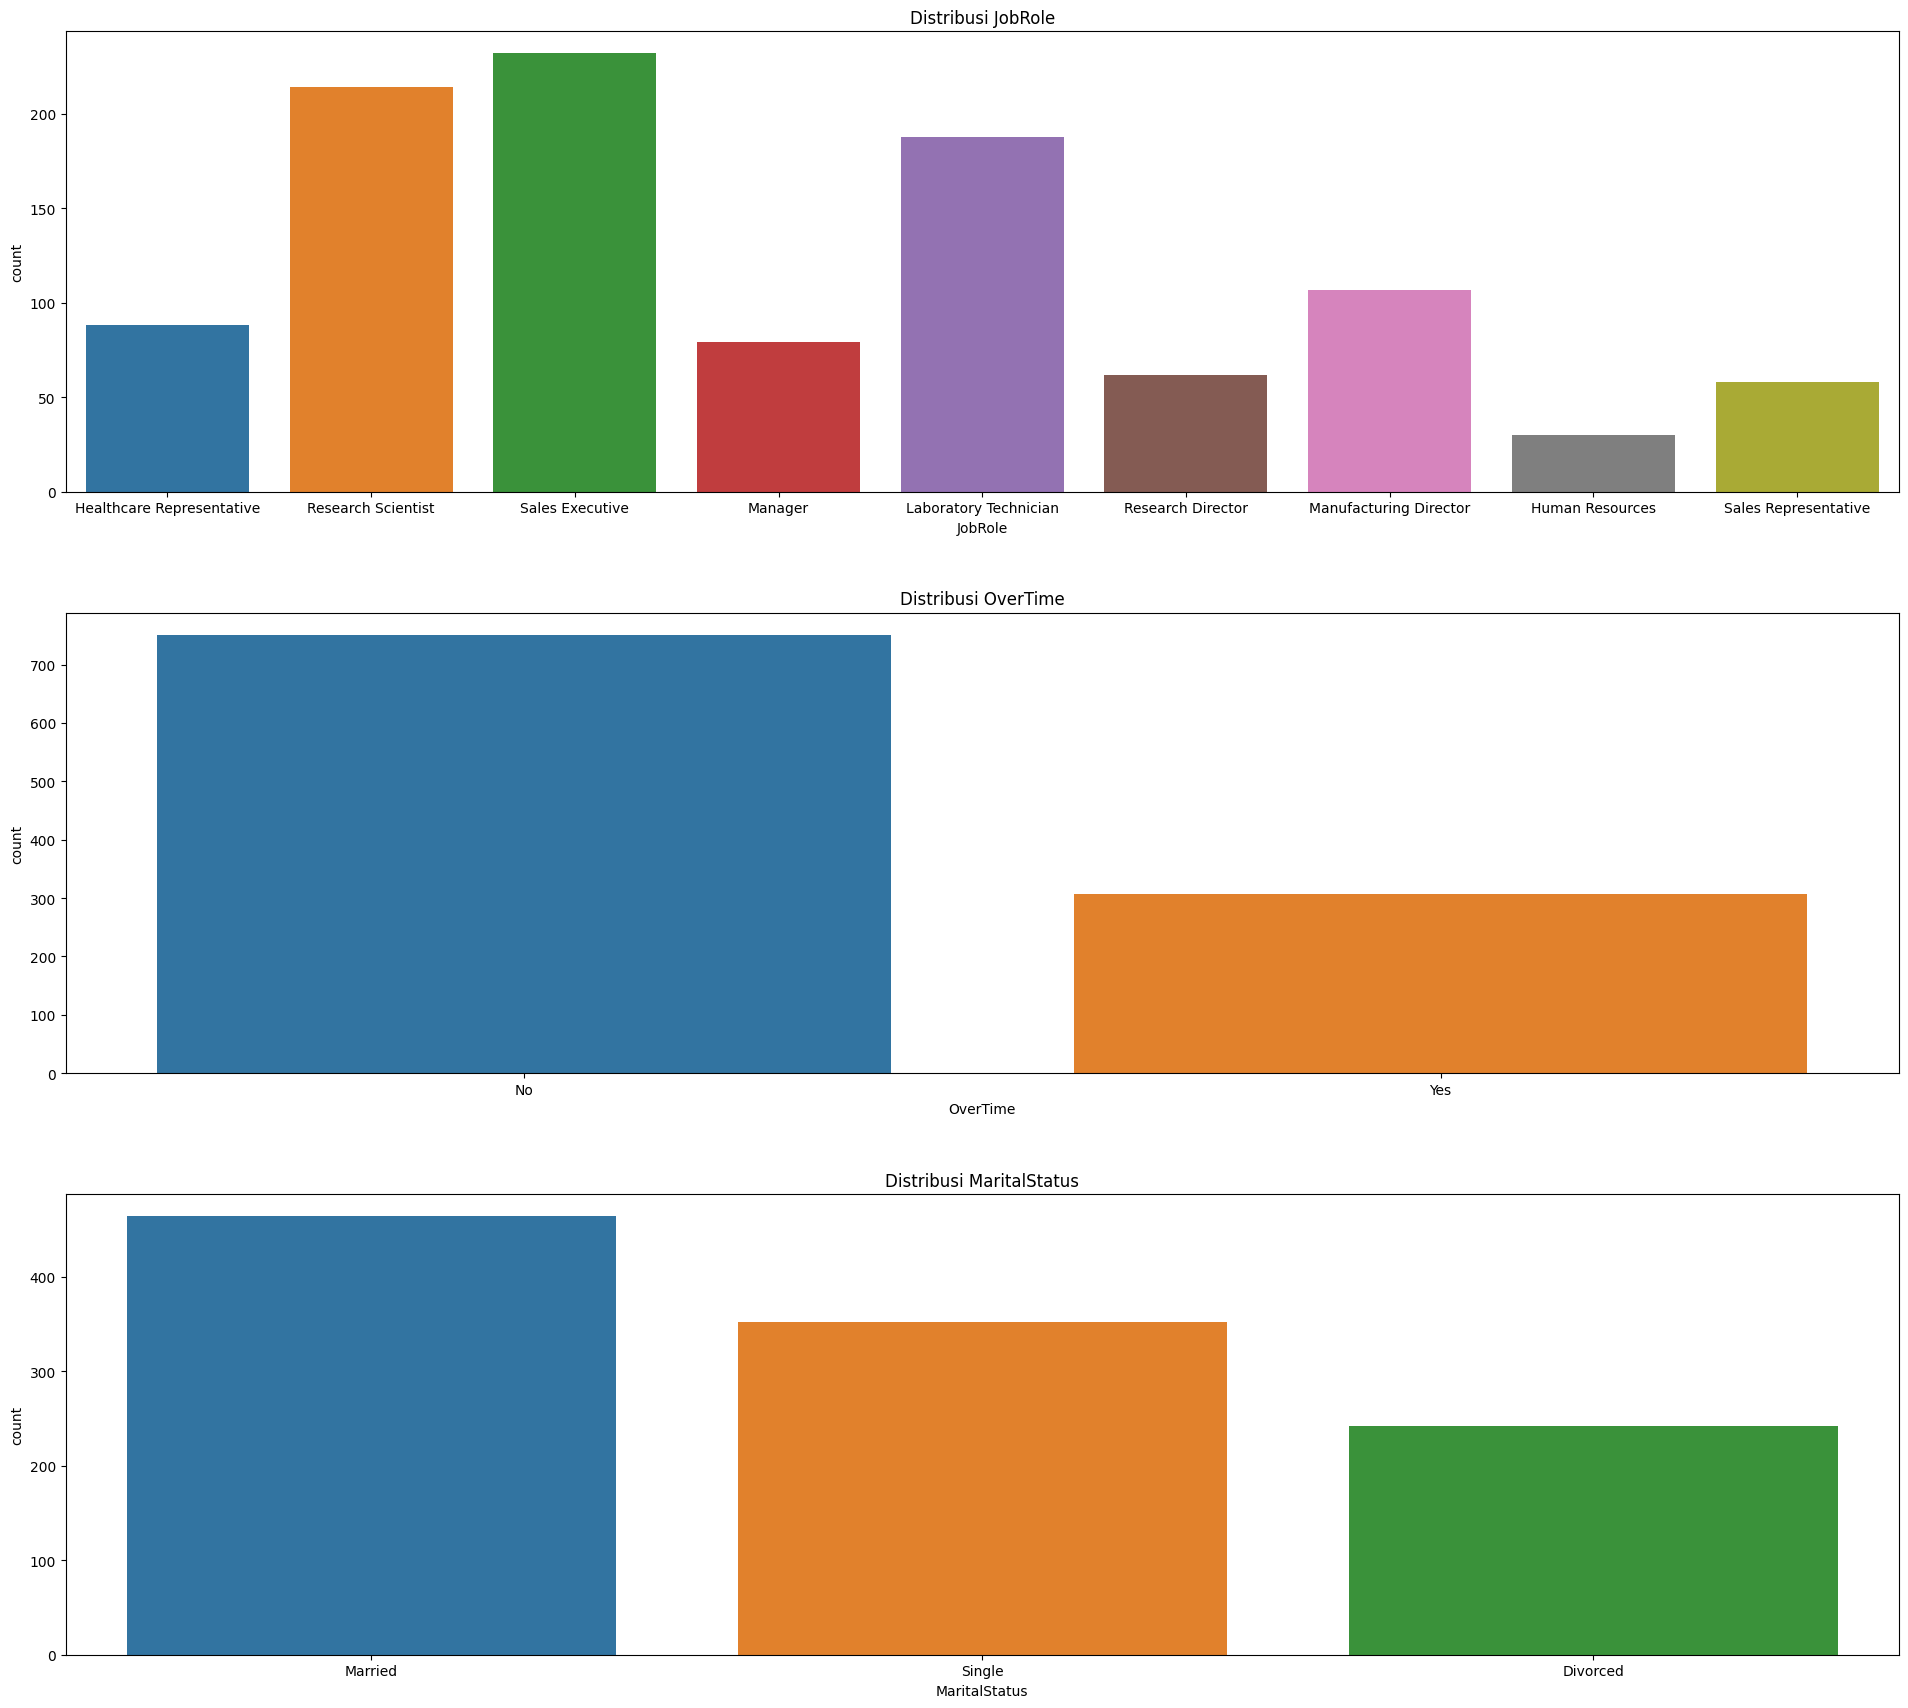

In [169]:
fig, ax = plt.subplots(len(import_cat), 1, figsize=(20, 6 * len(import_cat)))

for i, feature in enumerate(import_cat):
    sns.countplot(data=features_df, x=feature, hue=feature, ax=ax[i])
    ax[i].set_title(f'Distribusi {feature}')
    ax[i].tick_params(axis='x')

plt.tight_layout(pad=4.0)
plt.show()

In [170]:
def cat_plot(features, df, segment_feature="Attrition"):
    fig, ax = plt.subplots(len(features), 1, figsize=(16, 5 * len(features)))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
        ax[i].set_title(f'Distribusi {feature} Berdasarkan {segment_feature}', fontsize=12)
        ax[i].tick_params(axis='x')

    plt.tight_layout(pad=3.0)
    plt.show()

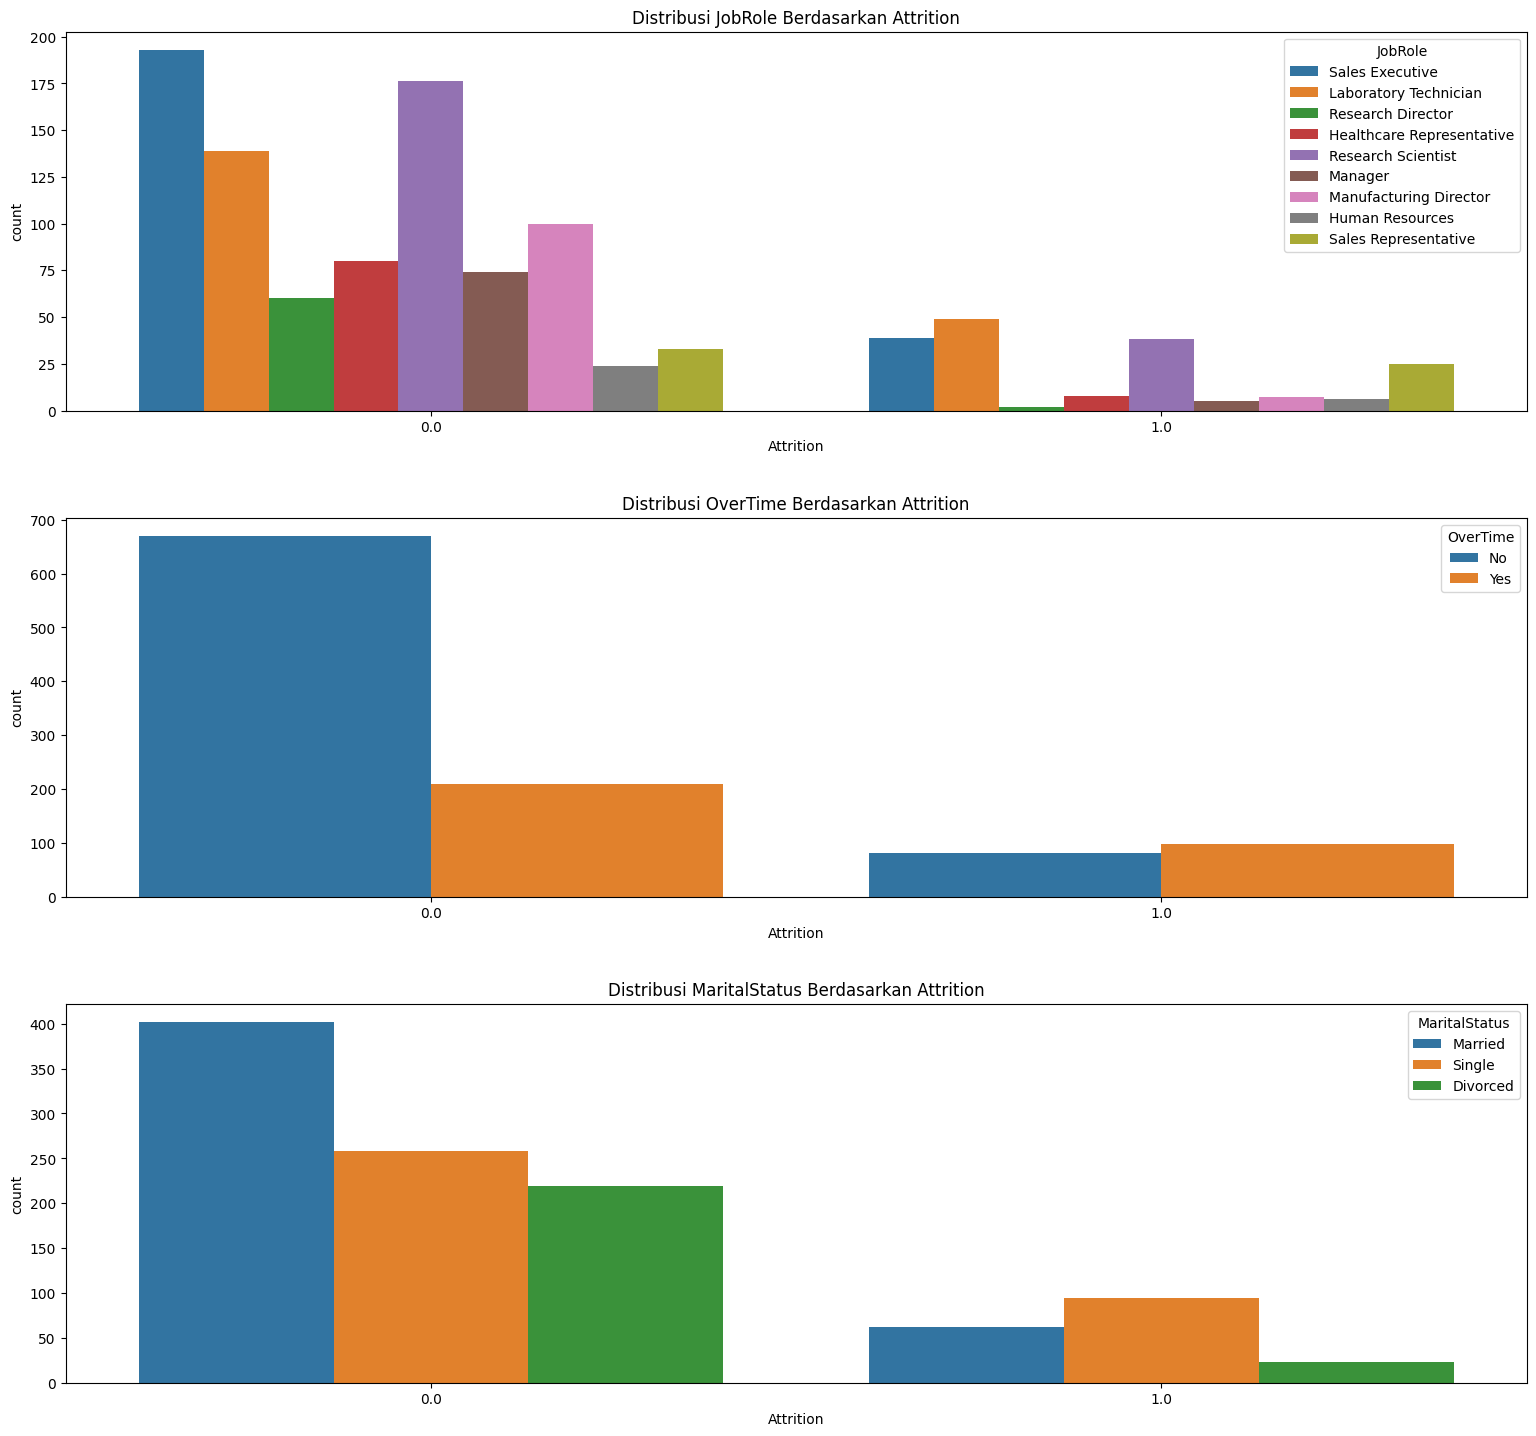

In [171]:
cat_plot(features=import_cat, df=features_df)

In [172]:
def num(features, df):
    fig, ax = plt.subplots(len(features), 1, figsize=(16, 5 * len(features)))
    for i, feature in enumerate(features):
        sns.histplot(df[feature], kde=True, ax=ax[i], bins=30)
        ax[i].set_title(f'Distribusi {feature}', fontsize=12)
        ax[i].set_xlabel(feature, fontsize=10)
        ax[i].tick_params(axis='x')

    plt.tight_layout(pad=3.0)
    plt.show()

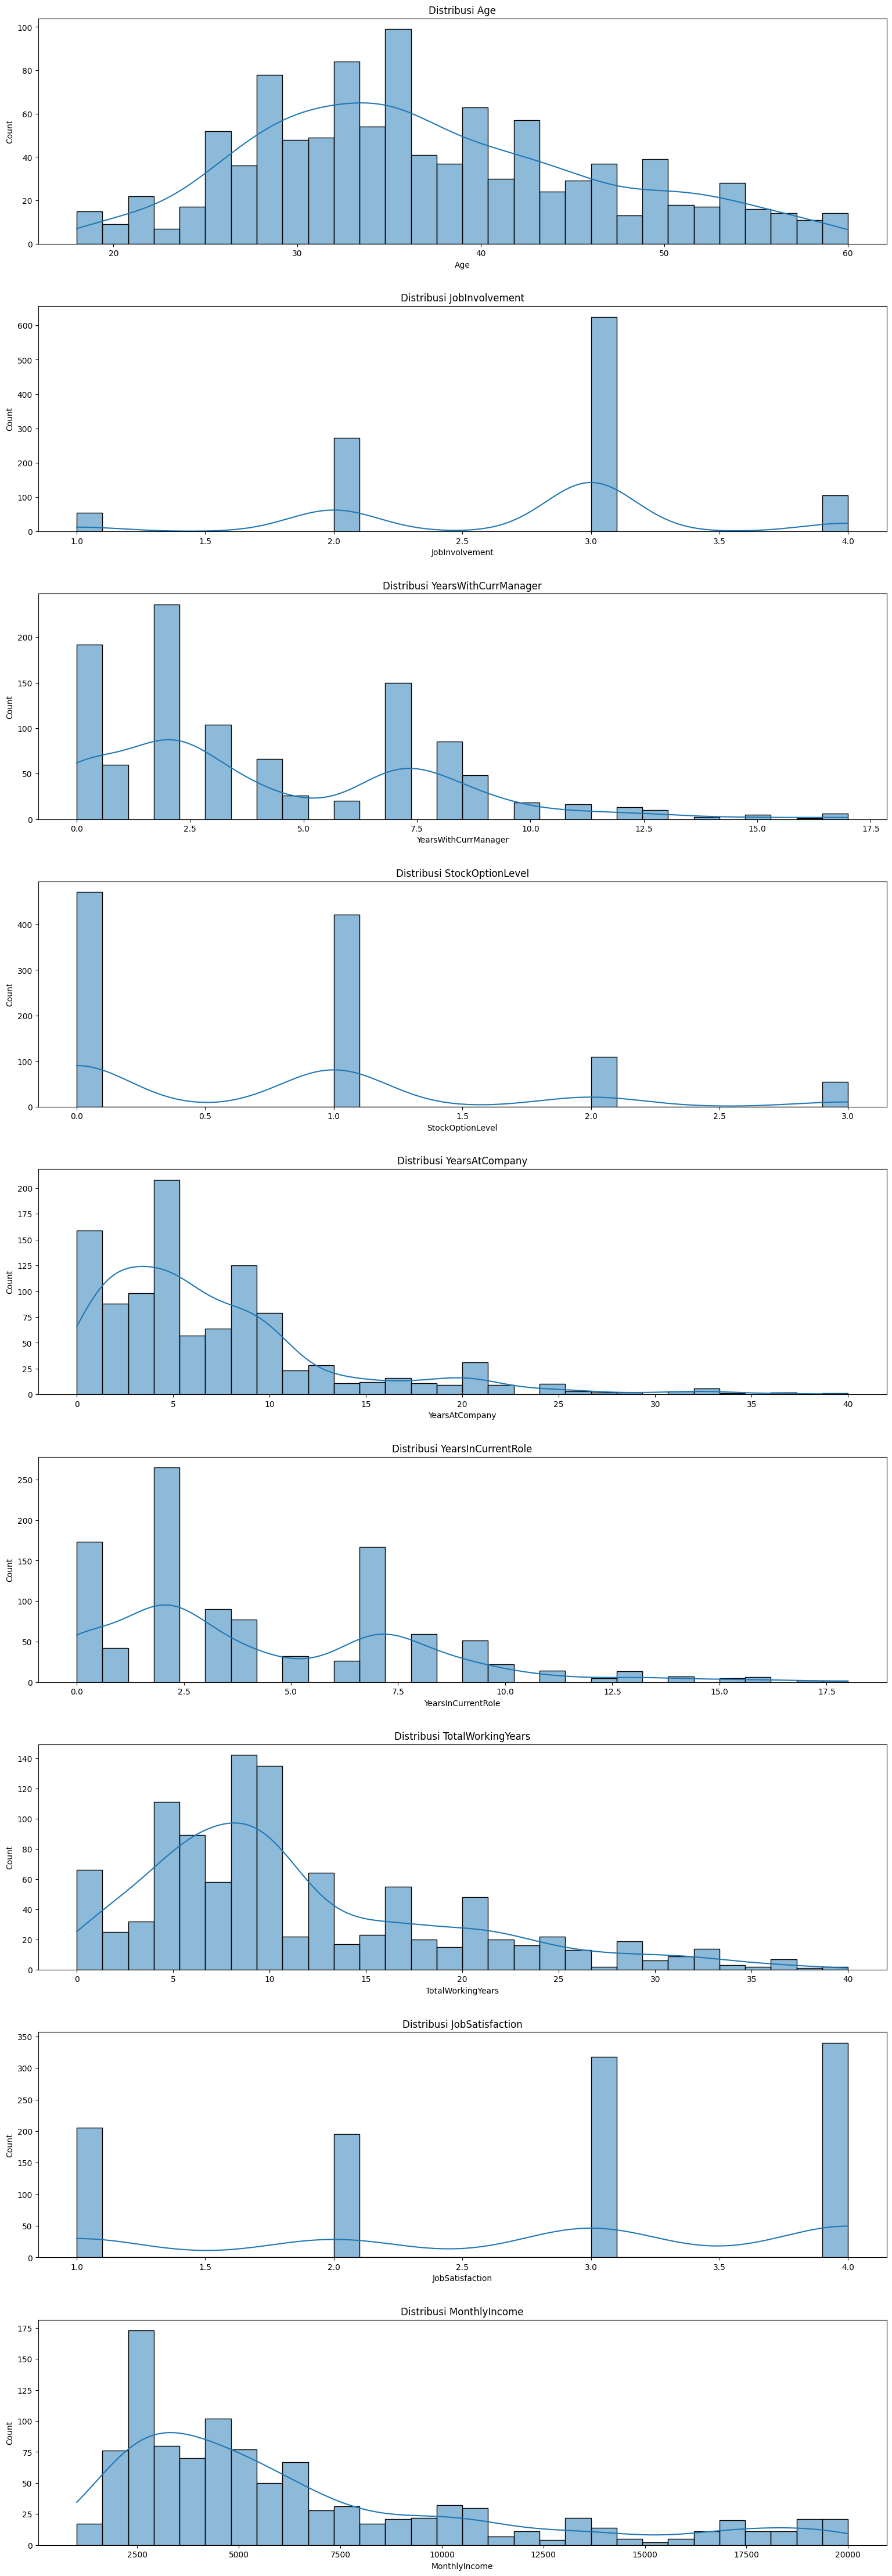

In [173]:
num(import_num, features_df)

In [174]:
def num_plot(features, df, segment_feature="Attrition"):
    fig, axes = plt.subplots(len(features), 1, figsize=(16, 5 * len(features)))
    if len(features) == 1:
        axes = [axes]

    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, hue=segment_feature, kde=True, multiple='stack', ax=axes[i], bins=30)
        axes[i].set_title(f'Distribusi {feature} Berdasarkan {segment_feature}')
        axes[i].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

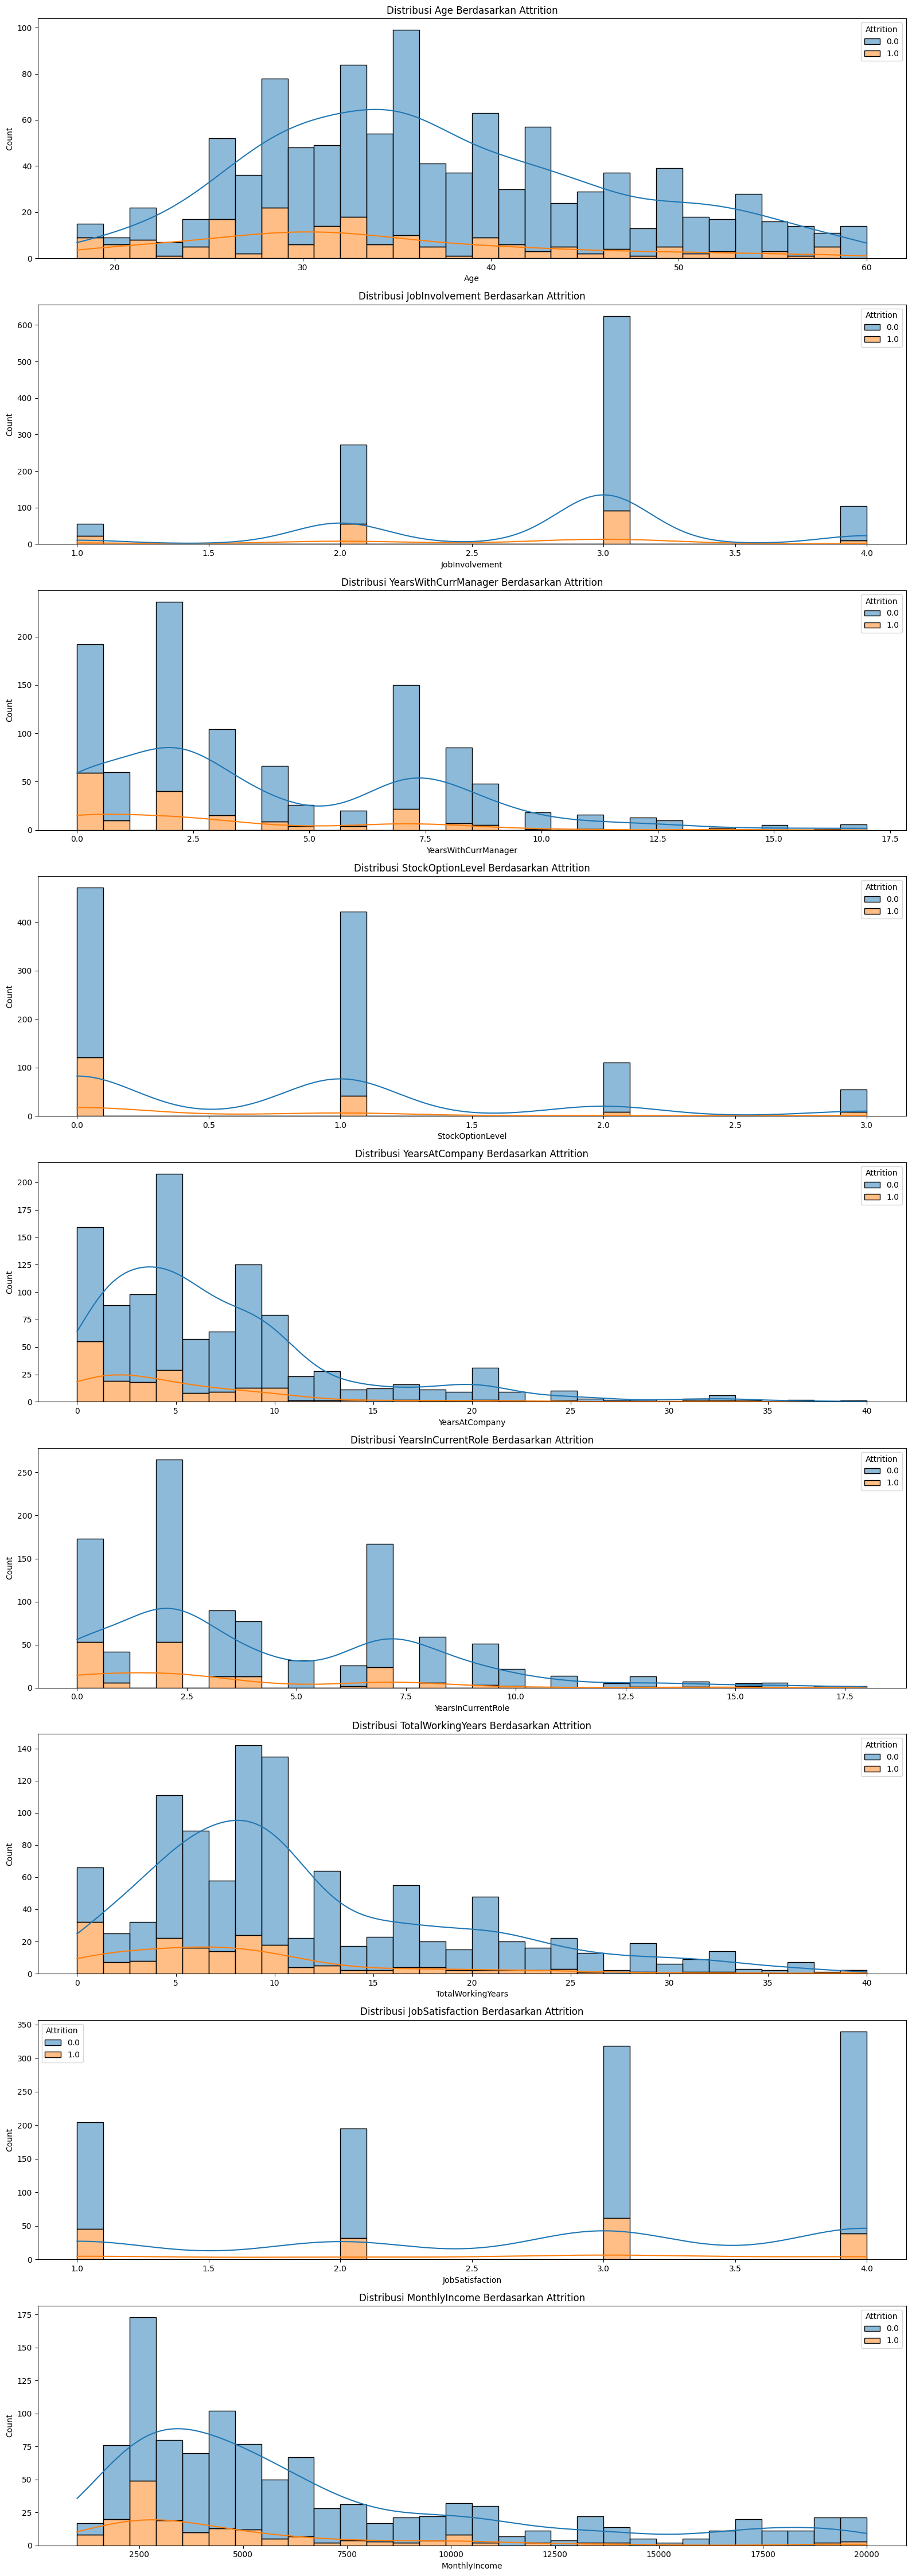

In [175]:
num_plot(import_num, features_df)

## **Modelling**

In [176]:
X = pd.get_dummies(features_df_final.drop('Attrition', axis=1), drop_first=True)
y = features_df_final['Attrition']

In [177]:
print(y.value_counts(normalize=True))

Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


In [178]:
rosa = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rosa.fit_resample(X, y)

In [179]:
print(y_resampled.value_counts(normalize=True))

Attrition
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

std = StandardScaler()
num_features = [col for col in X_resampled.columns if any(num_feat in col for num_feat in import_num)]

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = std.fit_transform(X_train_scaled[num_features])
X_test_scaled[num_features] = std.transform(X_test_scaled[num_features])

In [181]:
param_grids = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        },
    }
}

best_models = {}

for name, cfg in param_grids.items():
    print(f"Tuning: {name}")

    grid_search = GridSearchCV(
        estimator=cfg["model"],
        param_grid=cfg["params"],
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid_search.fit(X_train_scaled, y_train)
    best_models[name] = grid_search.best_estimator_

    print(f"Best Param: {grid_search.best_params_}")
    print(f"Best F1 Score: {grid_search.best_score_:.4f}\n")

Tuning: Random Forest
Best Param: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best F1 Score: 0.9354



In [197]:
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

## **Evaluasi**

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       220
         1.0       0.92      0.99      0.95       220

    accuracy                           0.95       440
   macro avg       0.95      0.95      0.95       440
weighted avg       0.95      0.95      0.95       440



In [199]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9523


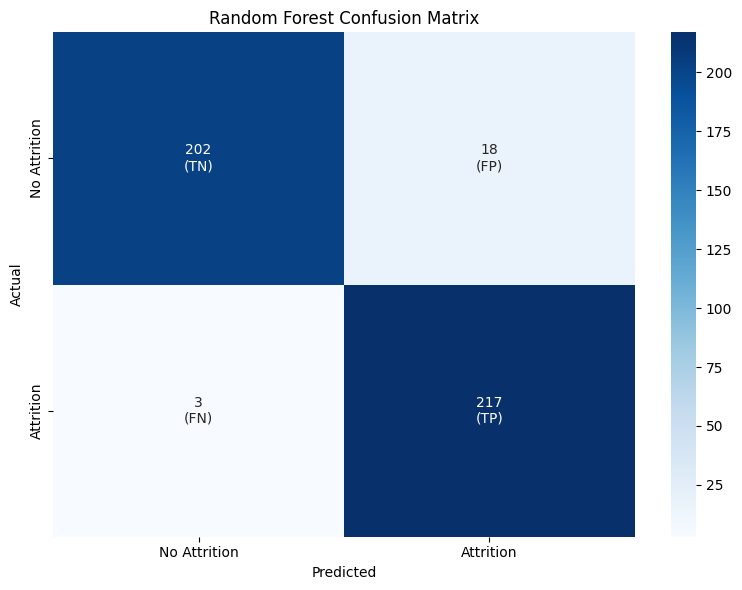

In [200]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
labels = np.array([['(TN)', '(FP)'], ['(FN)', '(TP)']])

annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f'{cm[i, j]}\n{labels[i, j]}'

sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()

In [186]:
import_feature = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

rank = import_feature.head(20)
print(rank)

                           Feature  Importance
8                    MonthlyIncome    0.135619
0                              Age    0.121668
6                TotalWorkingYears    0.105726
4                   YearsAtCompany    0.091965
17                    OverTime_Yes    0.088766
2             YearsWithCurrManager    0.070448
3                 StockOptionLevel    0.069224
7                  JobSatisfaction    0.065842
5               YearsInCurrentRole    0.065464
1                   JobInvolvement    0.050023
19            MaritalStatus_Single    0.023562
18           MaritalStatus_Married    0.018379
15         JobRole_Sales Executive    0.017137
10   JobRole_Laboratory Technician    0.017017
14      JobRole_Research Scientist    0.017004
12  JobRole_Manufacturing Director    0.012252
16    JobRole_Sales Representative    0.011424
13       JobRole_Research Director    0.006738
11                 JobRole_Manager    0.006040
9          JobRole_Human Resources    0.005701


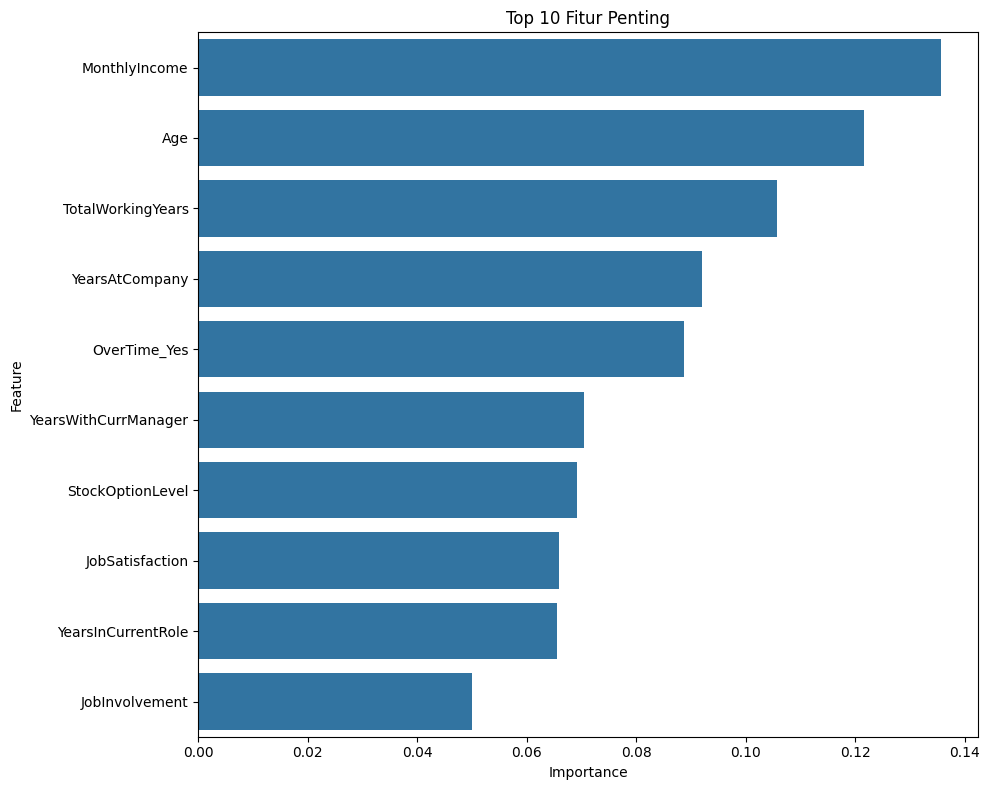

In [187]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=import_feature.head(10))
plt.title('Top 10 Fitur Penting')
plt.tight_layout()
plt.show()

## **Saved Model**

In [188]:
import_feature.to_csv('feature.csv', index=False)

In [189]:
joblib.dump(rf, 'model.pkl')

['model.pkl']

In [190]:
joblib.dump(onho_enc, 'encoder.pkl')

['encoder.pkl']

## **Testing**

In [191]:
pred_df = features_df[features_df['Attrition'] != 1]
pred_df

,JobRole,OverTime,MaritalStatus,Age,JobInvolvement,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,TotalWorkingYears,JobSatisfaction,MonthlyIncome,Attrition
3,Sales Executive,No,Married,42,3,8,1,20,4,23,2,13525,0.0
6,Sales Executive,Yes,Married,40,1,2,3,4,3,6,4,7457,0.0
8,Laboratory Technician,No,Single,36,3,7,0,8,1,8,4,2153,0.0
9,Research Director,No,Single,32,3,7,0,7,7,10,4,11159,0.0
10,Sales Executive,No,Married,25,2,3,0,5,2,5,1,4256,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,Manager,No,Single,48,4,1,0,5,4,27,4,16885,0.0
1461,Research Scientist,No,Single,44,3,3,0,5,2,6,2,3420,0.0
1463,Sales Executive,No,Single,53,3,10,0,14,7,18,1,8381,0.0
1465,Manufacturing Director,Yes,Single,38,3,0,0,1,0,10,3,7861,0.0


In [204]:
def encode_input(df, onho_enc, import_cat, import_num):
    X_cat = onho_enc.transform(df[import_cat])
    cat_cols = onho_enc.get_feature_names_out(import_cat)

    X_num = df[import_num].reset_index(drop=True)

    X_ready = pd.concat([X_num, pd.DataFrame(X_cat, columns=cat_cols, index=X_num.index)], axis=1)
    return X_ready

def predict_and_save():
    with open("model.pkl", "rb") as file:
        model = joblib.load(file)

    encoder = joblib.load("encoder.pkl")

    df = pred_df

    if "Attrition" in df.columns:
        actual_attrition = df["Attrition"].copy()
        df = df.drop(columns=["Attrition"])
    else:
        actual_attrition = None

    import_cat = ['JobRole', 'OverTime', 'MaritalStatus']
    import_num = ['Age', 'JobInvolvement', 'YearsWithCurrManager', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'TotalWorkingYears', 'JobSatisfaction', 'MonthlyIncome']

    X_ready = encode_input(df, onho_enc, import_cat, import_num)

    prediction = model.predict(X_ready)
    proba = model.predict_proba(X_ready)

    index = np.random.randint(0, len(df))
    print(df.iloc[index])

    print(f"\nPrediksi: Karyawan tidak akan keluar (Attrition = 0), kemungkinan keluar: {proba[index][0]:.2%}")

    df["Attrition (Actual)"] = actual_attrition if actual_attrition is not None else "-"
    df["PredictedAttrition"] = prediction
    df["Probability"] = [round(p[1], 4) for p in proba]

    df.to_csv("pred.csv", index=False)
    df.head()

if __name__ == "__main__":
    predict_and_save()

JobRole                 Manufacturing Director
OverTime                                    No
MaritalStatus                           Single
Age                                         31
JobInvolvement                               3
YearsWithCurrManager                         8
StockOptionLevel                             0
YearsAtCompany                              11
YearsInCurrentRole                           7
TotalWorkingYears                           11
JobSatisfaction                              4
MonthlyIncome                             4424
Name: 462, dtype: object

Prediksi: Karyawan tidak akan keluar (Attrition = 0), kemungkinan keluar: 60.00%


In [193]:
!pip freeze > requirements.txt